### **Machine Learning using Python**
#### **Linear Regression with `NumPy`**

##### Author: **`Bilal KACEL`**
##### Version: 1.0.0

## **1. Import dependencies...**

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## **2. Dataset**

Let's generate a dataset

In [ ]:
# x: Matrix of Features
# y: Matrix of Target

x, y = make_regression(n_samples=100, n_features=1, noise=10)

Display data

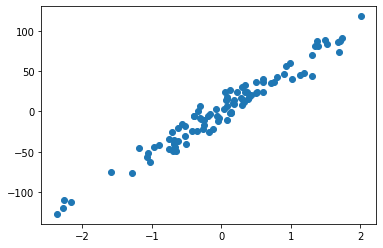

In [ ]:
plt.scatter(x, y)

Check the sample's shape: 100 rows/examples (of 1 feature)

In [ ]:
x.shape

(100, 1)

Check the target's shape: 100 (for the previous 100 rows)

In [ ]:
y.shape

(100,)

We need to specify explicitly that the target shape has one column

In [ ]:
y = y.reshape(y.shape[0], 1)
y.shape

(100, 1)

Creation of the matrix X with the biais column with ones (at the right side)

In [ ]:
X = np.hstack(( x, np.ones(x.shape) ))
X.shape

(100, 2)

Let's see what's the head of the data

In [ ]:
print(X[:5])

[[-0.68523584  1.        ]
 [-0.50816613  1.        ]
 [ 1.48801992  1.        ]
 [ 0.04003571  1.        ]
 [-0.89497632  1.        ]]


Initialization of the parameter vector $\theta$

In [ ]:
theta = np.random.randn(2, 1)
theta.shape

(2, 1)

In [ ]:
print(theta)

[[-1.31063444]
 [ 0.85355492]]


Until here, we get: 
*   $X$ : matrix of Features
*   $y$ : matrix of Target
*   $\theta$ : matrix of Parameters


## **3. Model**

As we would like to implement a `Linear Regression` then the model to create corresponds to the linear function: **$F = X . \theta$**

In [ ]:
def model(X, theta):

    return X.dot(theta)

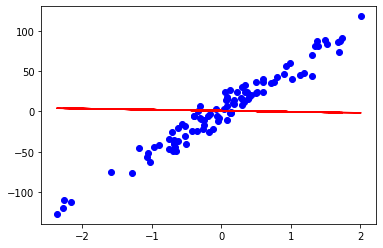

In [ ]:
plt.scatter(x, y, c='b')
plt.plot(x, model(X, theta), c='r')

## **4. Loss (cost function)**

Here, we choose to use the **`MSE`**: ***Mean Squared Error***:

$$ J(\theta) = \frac{1}{2m} \sum (X.\theta - Y)^2 $$


In [ ]:
def cost_function(X, y, theta):
    m = len(y) # m: nb of examples in the dataset = 100
    
    return 1/(2*m) * np.sum( (model(X, theta) - y)**2 )

Let's test the loss value for this (not performing) model

In [ ]:
cost_function(X, y, theta)

1174.1525865306894

## **5. Gradient Descent**

Calculation of the gradients:

$$ \frac{\partial J(\theta)}{\partial(\theta)} = \frac{1}{m} . X^T . (X.\theta - Y)$$

In [ ]:
def grad(X, y, theta):
    m = len(y)
    
    return 1/m * X.T.dot(model(X, theta) - y)

Implementation of the Gradient Descent algorithm:

$$ \theta = \theta - \alpha . \frac{\partial J(\theta)}{\partial(\theta)}$$

In [ ]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations)
    
    for i in range(0, n_iterations):
        theta = theta - (learning_rate * grad(X, y, theta)) # iterative update of the parameters vector 'theta'
        cost_history[i] = cost_function(X, y, theta) # Historization of the losses during the interations
        
    return theta, cost_history

## **6. Model Training**

In [ ]:
# Test 1
# theta_final = gradient_descent(X, y, theta, learning_rate=0.001, n_iterations=1000)

# Test 2
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [ ]:
theta_final.shape

(2, 1)

In [ ]:
print(theta_final)

[[51.87310527]
 [ 1.38001369]]


## **7. Predictions**

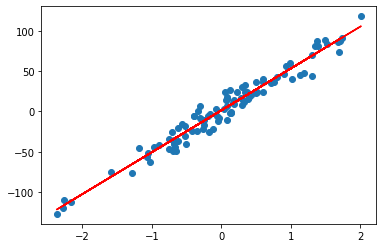

In [ ]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

## **8. Learning curve**

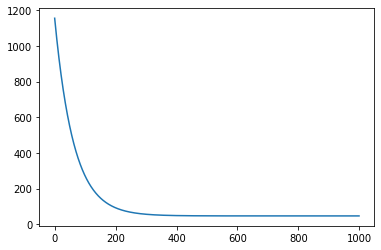

In [ ]:
plt.plot(range(1000), cost_history)

## **8. Evaluation**

To evaluate the performance of the model, we can use the ***Determination coefficient***:

$$ R^2 = 1 - \frac{\sum(y - f(x))^2 }{\sum(y - \bar y )^2} $$

In [ ]:
def coef_determination(y, pred):
    
    u = ( (y - pred)**2 ).sum() # Résidu de la somme des carrés
    v = ( (y - y.mean())**2 ).sum() # Somme totale des carrés
    
    return 1 - (u / v)

In [ ]:
coef_determination(y, predictions)

0.9582735775473616

Looking to the result, our model "seems" to perform at 96%